In [1]:
import pandas as pd
import numpy as np
import csv 
import json
import matplotlib.pyplot as plt

reading csv file

In [2]:
data = pd.read_excel("Online Retail.xlsx")


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


finding null or emplty rows


In [4]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# checking for null data

data2 = data.dropna()
data2.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

checking for duplicate value

In [6]:
# checking for duplicate value

data_duplicate = data2[data2.duplicated()] # getting subset data of only duplicate values
data_duplicate.info()   # looking for no of duplicated values


<class 'pandas.core.frame.DataFrame'>
Index: 5225 entries, 517 to 541701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    5225 non-null   object        
 1   StockCode    5225 non-null   object        
 2   Description  5225 non-null   object        
 3   Quantity     5225 non-null   int64         
 4   InvoiceDate  5225 non-null   datetime64[ns]
 5   UnitPrice    5225 non-null   float64       
 6   CustomerID   5225 non-null   float64       
 7   Country      5225 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 367.4+ KB


removing duplicates and negative values

In [7]:
data3 = data2.drop_duplicates()
data3 = data3[(data3['Quantity']>0) & (data3['UnitPrice']>0) & (data3['CustomerID']>0)]

data3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


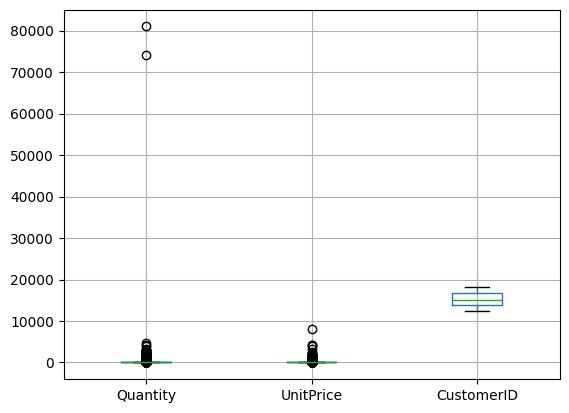

In [8]:
data3.boxplot()
plt.show()

removing outliers

In [9]:
# outliers for quantity
Q1_quantity = data3['Quantity'].quantile(0.25)
Q2_quantity = data3['Quantity'].quantile(0.50)
Q3_quantity = data3['Quantity'].quantile(0.75)

InterQuartileRange_quantity = Q3_quantity - Q1_quantity

quantity_lowerbound = Q1_quantity - (1.5*InterQuartileRange_quantity)
quantity_upperbound = Q3_quantity + (1.5*InterQuartileRange_quantity)

# outliers for unitprice
Q1_price = data3['UnitPrice'].quantile(0.25)
Q2_price = data3['UnitPrice'].quantile(0.50)
Q3_price = data3['UnitPrice'].quantile(0.75)

InterQuartileRange_price = Q3_price - Q1_price

Price_lowerbound = Q1_price - (1.5*InterQuartileRange_price)
Price_upperbound = Q3_price + (1.5*InterQuartileRange_price)

# outliers for customerID
Q1_customerID = data3['CustomerID'].quantile(0.25)
Q2_customerID = data3['CustomerID'].quantile(0.50)
Q3_customerID = data3['CustomerID'].quantile(0.75)

InterQuartileRange_customerID = Q3_customerID - Q1_customerID

CustomerID_lowerbound = Q1_customerID - (1.5*InterQuartileRange_customerID)
CustomerID_upperbound = Q3_customerID + (1.5*InterQuartileRange_customerID)



In [10]:
new_data_frame = data3[
    (data3['Quantity']>= quantity_lowerbound) & (data3['Quantity']<= quantity_upperbound) &
    (data3['UnitPrice']>= Price_lowerbound) & (data3['UnitPrice']<= Price_upperbound) &
    (data3['CustomerID'] >= CustomerID_lowerbound) & (data3['CustomerID']<= CustomerID_upperbound)
]



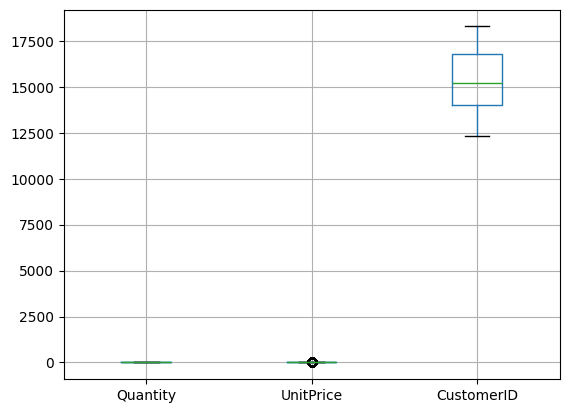

In [11]:
new_data_frame.boxplot()
plt.show()

discriptive stats

In [12]:
new_data_frame.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,333234.000000,333234,333234.000000,333234.000000
mean,7.550682,2011-07-12 13:40:57.393723136,2.194218,15318.903614
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-08 09:54:00,1.250000,13988.000000
50%,6.000000,2011-08-03 12:06:00,1.650000,15235.000000
75%,12.000000,2011-10-23 11:42:00,2.950000,16814.000000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000
std,6.777237,NaN,1.546015,1711.175915


Normalize the Data

In [13]:

# Assume new_data_frame is already defined and contains the necessary data
print("Initial columns:", new_data_frame.columns)

# Calculate TotalAmountSpent for each row
new_data_frame['TotalAmountSpent'] = new_data_frame['Quantity'] * new_data_frame['UnitPrice']

# Calculate TotalItemsPurchased per customer
total_items_purchased = new_data_frame.groupby('CustomerID')['Quantity'].sum().reset_index()
# total_items_purchased is calculated by summing up the 'Quantity' for each customer (CustomerID)
total_items_purchased.columns = ['CustomerID', 'TotalItemsPurchased']

# Check total_items_purchased DataFrame
print("Total items purchased DataFrame before merge:\n", total_items_purchased)

# Merge the total items purchased back to the original DataFrame
new_data_frame = pd.merge(new_data_frame, total_items_purchased, on='CustomerID', how='left')

# Check new_data_frame columns after merge
print("Columns after merge:", new_data_frame.columns)

# Calculate AveragePurchaseValue for each row
# Check if 'TotalItemsPurchased' is in new_data_frame columns before calculation
if 'TotalItemsPurchased' in new_data_frame.columns:
    new_data_frame['AveragePurchaseValue'] = new_data_frame['TotalAmountSpent'] / new_data_frame['TotalItemsPurchased']
else:
    print("Error: 'TotalItemsPurchased' column not found in new_data_frame.")


Initial columns: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
Total items purchased DataFrame before merge:
       CustomerID  TotalItemsPurchased
0        12347.0                 1893
1        12348.0                  140
2        12349.0                  523
3        12350.0                  196
4        12352.0                  500
...          ...                  ...
4186     18280.0                   40
4187     18281.0                   52
4188     18282.0                   51
4189     18283.0                 1353
4190     18287.0                  778

[4191 rows x 2 columns]
Columns after merge: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmountSpent',
       'TotalItemsPurchased'],
      dtype='object')


C:\Users\YATRI GOR\AppData\Local\Temp\ipykernel_12232\3766549618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_frame['TotalAmountSpent'] = new_data_frame['Quantity'] * new_data_frame['UnitPrice']


A StandardScaler is used to normalize the features ('TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue') so that clustering isn't affected by the scale of the variables.

In [14]:
from sklearn.preprocessing import StandardScaler

features = ['TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data_frame[features])

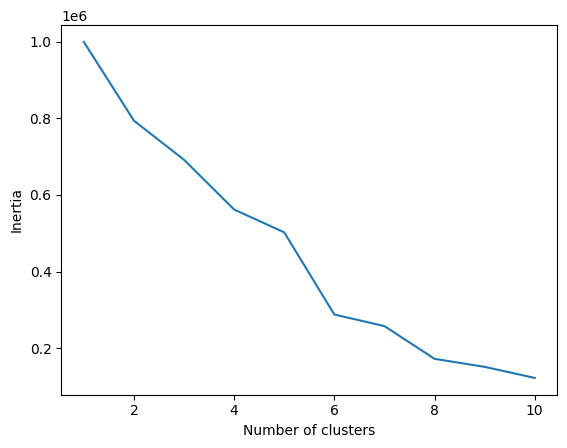

In [ ]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    # will store the sum of squared values (inertia) for different values of k
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Statistics for TotalAmountSpent and TotalItemsPurchased

In [16]:
print("Descriptive Statistics:")
print(new_data_frame[['TotalAmountSpent', 'TotalItemsPurchased']].describe())


Descriptive Statistics:
       TotalAmountSpent  TotalItemsPurchased
count     333234.000000        333234.000000
mean          12.902273          3088.130599
std           13.214967          6666.390960
min            0.001000             1.000000
25%            3.900000           493.000000
50%           10.140000          1204.000000
75%           17.400000          2558.000000
max          178.800000         49386.000000


appling K means

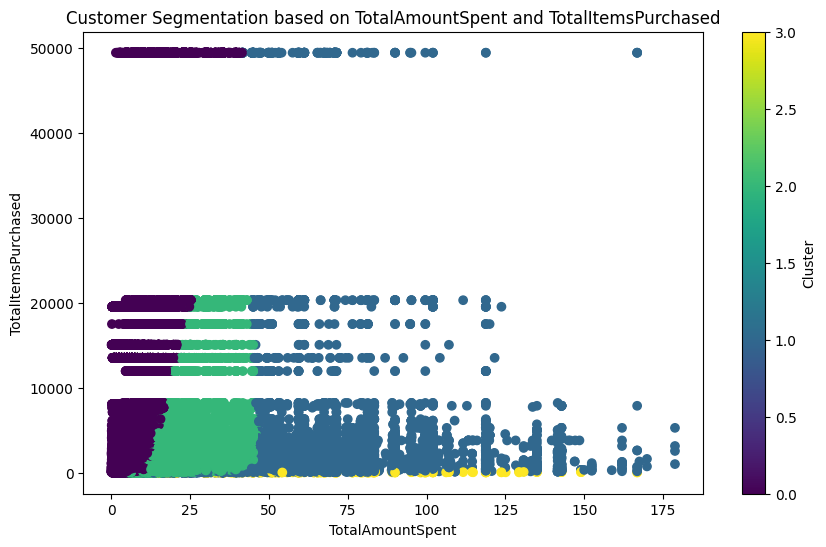

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
new_data_frame['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(new_data_frame['TotalAmountSpent'], new_data_frame['TotalItemsPurchased'], c=new_data_frame['Cluster'], cmap='viridis')
plt.title("Customer Segmentation based on TotalAmountSpent and TotalItemsPurchased")
plt.xlabel("TotalAmountSpent")
plt.ylabel("TotalItemsPurchased")
plt.colorbar(label="Cluster")
plt.show()


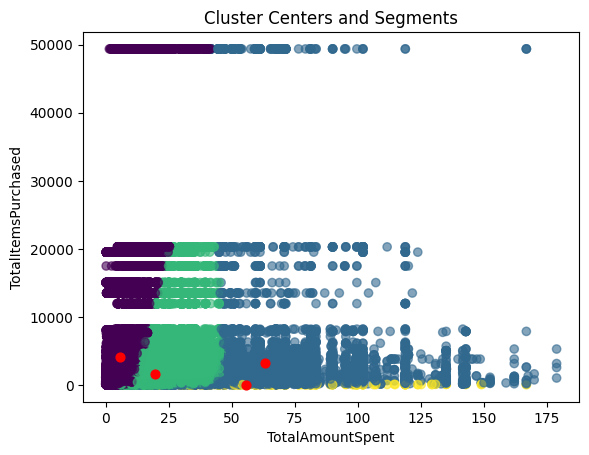

In [18]:
cluster_centers = kmeans.cluster_centers_
# Since the data is scaled, we need to inverse transform to get back to original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
plt.scatter(new_data_frame['TotalAmountSpent'], new_data_frame['TotalItemsPurchased'], c=new_data_frame['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], s=40, c='red', marker='o')  # Cluster centers
plt.title("Cluster Centers and Segments")
plt.xlabel("TotalAmountSpent")
plt.ylabel("TotalItemsPurchased")
plt.show()

analysing clusters 

In [19]:
cols_to_convert = ['TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue']

# Applying pd.to_numeric with errors='coerce' to relevant columns
for col in cols_to_convert:
    new_data_frame[col] = pd.to_numeric(new_data_frame[col], errors='coerce') # If any value in the column cannot be converted (e.g., due to invalid data like a string), it will be replaced with NaN (missing value) instead of throwing an error.

# Select only numeric columns for aggregation
numeric_cols = new_data_frame.select_dtypes(include='number').columns.tolist() #This converts the column names of those numeric columns into a list.

# Group by 'Cluster' and calculate the mean for numeric columns
try:
    cluster_analysis = new_data_frame.groupby('Cluster')[numeric_cols].mean()
    print("Cluster Analysis:\n", cluster_analysis)  
except KeyError as e:
    print(f"Column not found: {e}")
except TypeError as e:
    print(f"Type error: {e}")

Cluster Analysis:
           Quantity  UnitPrice    CustomerID  TotalAmountSpent  \
Cluster                                                         
0         5.327244   1.800370  15523.944288          5.553247   
1        16.660935   4.160492  15084.070643         63.092320   
2        10.070212   2.610574  15038.919894         19.627475   
3        12.760956   4.508446  15251.844622         55.504741   

         TotalItemsPurchased  AveragePurchaseValue  Cluster  
Cluster                                                      
0                4073.078127              0.007228      0.0  
1                3187.303792              0.144589      1.0  
2                1653.415176              0.033773      2.0  
3                  31.262948              2.091457      3.0  


In [20]:
for cluster in range(4):  # Assuming 4 clusters, adjust based on your clustering results
    print(f"\nCluster {cluster}:")
    print(f"Average Total Amount Spent: {cluster_analysis.loc[cluster, 'TotalAmountSpent']}")
    print(f"Average Total Items Purchased: {cluster_analysis.loc[cluster, 'TotalItemsPurchased']}")
    print(f"Average Purchase Value: {cluster_analysis.loc[cluster, 'AveragePurchaseValue']}")
    
    if cluster_analysis.loc[cluster, 'TotalAmountSpent'] > 500:
        print("Recommendation: These customers are high spenders, offering personalized recommendations and loyalty rewards would increase engagement.")
    elif cluster_analysis.loc[cluster, 'TotalItemsPurchased'] > 100:
        print("Recommendation: These customers are frequent shoppers. Providing them with bulk offers or subscriptions can keep them engaged.")
    else:
        print("Recommendation: These customers seem less active, consider offering discounts or personalized product suggestions to re-engage them.")


Cluster 0:
Average Total Amount Spent: 5.553246842721532
Average Total Items Purchased: 4073.0781269602307
Average Purchase Value: 0.007227762677963608
Recommendation: These customers are frequent shoppers. Providing them with bulk offers or subscriptions can keep them engaged.

Cluster 1:
Average Total Amount Spent: 63.09231970917666
Average Total Items Purchased: 3187.303792493614
Average Purchase Value: 0.1445889908123328
Recommendation: These customers are frequent shoppers. Providing them with bulk offers or subscriptions can keep them engaged.

Cluster 2:
Average Total Amount Spent: 19.62747454391982
Average Total Items Purchased: 1653.4151755499959
Average Purchase Value: 0.033773273379403404
Recommendation: These customers are frequent shoppers. Providing them with bulk offers or subscriptions can keep them engaged.

Cluster 3:
Average Total Amount Spent: 55.504741035856576
Average Total Items Purchased: 31.262948207171316
Average Purchase Value: 2.0914565261807136
Recommendat

High Spender Threshold: 63.69020035856755
Frequent Shopper Threshold: 4013.9137588660587


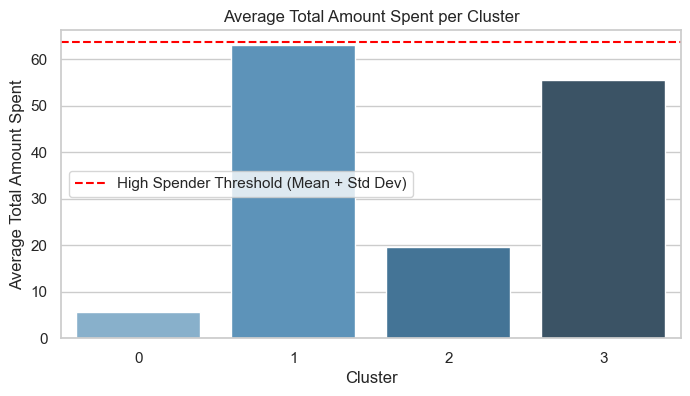

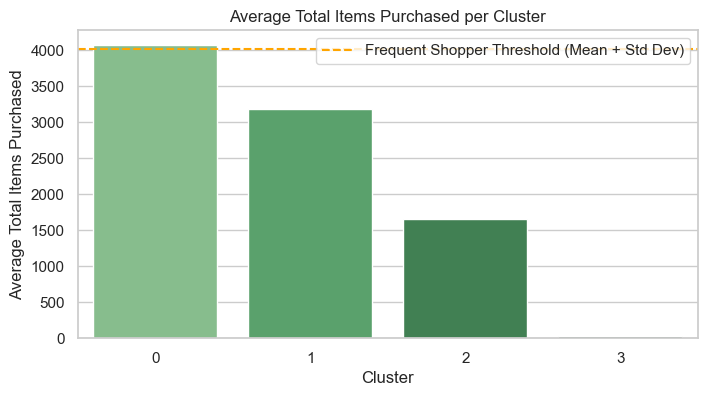

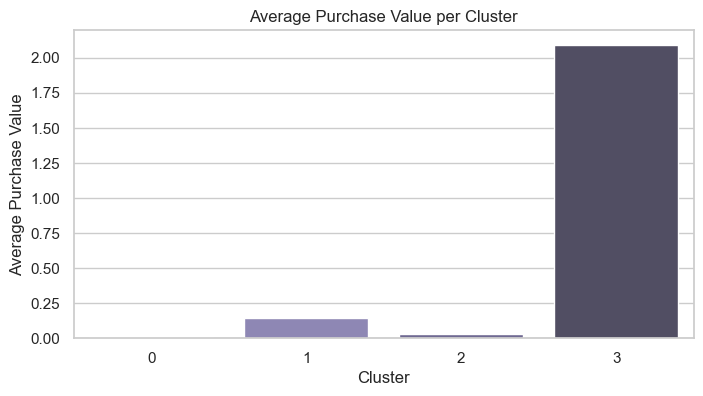

In [21]:
# Calculate summary statistics for each cluster
cluster_summary = cluster_analysis.describe()

# Calculate thresholds based on mean and standard deviation
high_spender_threshold = cluster_analysis['TotalAmountSpent'].mean() + cluster_analysis['TotalAmountSpent'].std()
frequent_shopper_threshold = cluster_analysis['TotalItemsPurchased'].mean() + cluster_analysis['TotalItemsPurchased'].std()

print(f"High Spender Threshold: {high_spender_threshold}")
print(f"Frequent Shopper Threshold: {frequent_shopper_threshold}")

# Set up plots for visualizing the clusters with data-driven thresholds
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Visualize Average Total Amount Spent per Cluster with threshold
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['TotalAmountSpent'], palette='Blues_d')
plt.title('Average Total Amount Spent per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Amount Spent')
plt.axhline(high_spender_threshold, color='red', linestyle='--', label="High Spender Threshold (Mean + Std Dev)")
plt.legend()
plt.show()

# Visualize Average Total Items Purchased per Cluster with threshold
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['TotalItemsPurchased'], palette='Greens_d')
plt.title('Average Total Items Purchased per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Items Purchased')
plt.axhline(frequent_shopper_threshold, color='orange', linestyle='--', label="Frequent Shopper Threshold (Mean + Std Dev)")
plt.legend()
plt.show()

# Visualize Average Purchase Value per Cluster
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['AveragePurchaseValue'], palette='Purples_d')
plt.title('Average Purchase Value per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Value')
plt.show()
